In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#データの作成
theta = np.linspace(0, 2*np.pi, 10)
r = np.ones_like(theta) + np.random.normal(0, 0.1, len(theta))  #すべての要素を1にして、ランダム性を加える

# デカルト座標系への変換
x = r * np.cos(theta)
y = r * np.sin(theta)

# スプライン補間（xとyを別々に補間）
f_x = interp1d(theta, x, kind='cubic')
f_y = interp1d(theta, y, kind='cubic')
theta_new = np.linspace(0, 2*np.pi, 1000)
x_interp = f_x(theta_new)
y_interp = f_y(theta_new)

# 平均(重心?)を求める
x_mean = np.mean(x_interp)
y_mean = np.mean(y_interp)

# プロット
plt.plot(x, y, 'ro', label="Control Points")
plt.plot(x_interp, y_interp, label="Interpolated Line")
plt.plot(x_mean, y_mean, 'bo', label="Mean Point")
plt.axis('equal')
plt.legend(loc='upper left')
plt.savefig("file1.png")
plt.show()

#特定のthetaに対応する輪郭のx,y座標を取得する部分
theta_value = 0.5
x_interp_value = f_x(theta_value)
y_interp_value = f_y(theta_value)
print(f"At theta = {theta_value}, (x, y) = ({x_interp_value}, {y_interp_value})")



0.7720115036052063


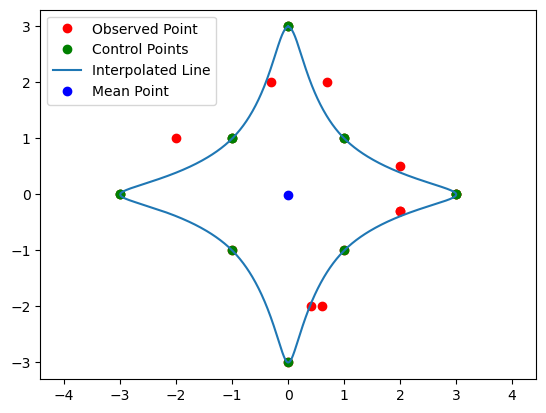

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math

#リスト内リストに格納された座標情報をx,yのリストにそれぞれ分解する
def x_y_separate(Contour):
    x = []
    y = []
    for i in range(len(Contour)):
        x.append(Contour[i][0])
        y.append(Contour[i][1])
    return x,y

#x,yのリストを受け取り、極座標変換する
def polor_coodinate(x,y):
    r = []
    theta = []
    #arctan()の返り値を0~2πにして、超えた分はθ+2πとして記録する
    first_try = True
    second_loop = False
    for i in range(len(x)):
        r.append(np.sqrt(x[i] ** 2 + y[i] ** 2))
        theta_check = np.arctan2(y[i],x[i])
        if theta_check > 0 and second_loop == False:
            theta.append(theta_check)
        elif theta_check < 0 and second_loop == False:
            theta.append(2*np.pi+theta_check)
        elif theta_check == 0 and first_try == True:
            theta.append(0)
            first_try = False
        elif theta_check == 0 and first_try == False:
            theta.append(2*np.pi)
            second_loop = True
        elif theta_check > 0 and second_loop == True:
                theta.append(theta_check + 2*np.pi)
        elif theta_check < 0 and second_loop == True:
                theta.append(2*np.pi+theta_check + 2*np.pi)
    return r,theta

#最小二乗法
def MSE(r_exp,r_cal):
    MSE = 0
    for r_exp, r_cal in zip(r_exp, r_cal):
        MSE += (r_exp - r_cal) ** 2 /r_cal**2
    MSE /= r_exp.size
    return MSE

#輪郭の代表点を準備
Contour_rep = [[3,0],[1,1],[0,3],[-1,1],[-3,0],[-1,-1],[0,-3],[1,-1],[3,0]]
x,y = x_y_separate(Contour_rep)
#補間線の曲率を一致させるために2週目の点をいくつか追加。
for i in range(1,5):
    x.append(x[i])
    y.append(y[i])

#極座標変換
r,theta = polor_coodinate(x,y)

# スプライン補間（xとyを別々に補間）
f_x = interp1d(theta, x, kind='cubic')
f_y = interp1d(theta, y, kind='cubic')

#補間線の描画
theta_new = np.linspace(0, 2*np.pi, 1000)
theta_new += theta[2] #描画の始点をtheta[2]分ずらす。
x_interp = f_x(theta_new)
y_interp = f_y(theta_new)

# 平均(重心?)を求める
x_mean = np.mean(x_interp)
y_mean = np.mean(y_interp)

#最小二乗法の処理
#実験データの準備
Contour_all = [[3,0],[2,0.5],[1,1],[0.7,2],[0,3],[-0.3,2],[-1,1],[-2,1],[-3,0],[2,-0.3],[-1,-1],[0.4,-2],[0,-3],[0.6,-2],[1,-1],[2,-0.3],[3,0]]
#特定のthetaに対応する輪郭のx,y座標を取得する部分
x_obs,y_obs = x_y_separate(Contour_all)
r_exp, theta_exp = polor_coodinate(x_obs,y_obs)
x_cal = f_x(theta_exp)
y_cal = f_y(theta_exp)
r_cal,_ = polor_coodinate(x_cal, y_cal)
print(MSE(r_cal,r_exp))

# プロット
plt.plot(x_obs,y_obs,'ro', label="Observed Point")
plt.plot(x, y, 'go', label="Control Points")
plt.plot(x_interp, y_interp, label="Interpolated Line")
plt.plot(x_mean, y_mean, 'bo', label="Mean Point")
plt.axis('equal')
plt.legend(loc='upper left')
plt.savefig("file1.png")
plt.show()